In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
import spacy
import os
pd.options.mode.chained_assignment = None
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinpahl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
other_file_prefix = 'others'

In [3]:
csvname="processed_dataset/"+other_file_prefix+".csv" #changed
# csvname=file_prefix+".csv" #changed
other_data=pd.read_csv(csvname)

In [4]:
def normalize(df):
    for feature in df.columns:
        if feature != 'class':
            feature_min = df[feature].min()
            feature_max = df[feature].max()
            df[feature] = (df[feature] - feature_min) / (feature_max - feature_min)    

    return df

In [5]:
df = normalize(other_data)

In [6]:
## PCA starts

In [7]:
from sklearn.decomposition import PCA
def perform_PCA (X_train, y_train, total_components, n_components):
  pca = PCA(n_components=total_components, random_state=0)
  pca.fit(X_train)
  X_pca = pca.transform(X_train)

  print("Variance explained by all", total_components, "principal components =", sum(pca.explained_variance_ratio_ * 100))

  csum = np.cumsum(pca.explained_variance_ratio_ * 100)
  print(csum)
  print ()

  # plot 
  import matplotlib.pyplot as plt
  plt.plot(csum)
  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  #plt.savefig('elbow_plot.png', dpi=100)

  # find the number of components
  print (csum[n_components-1])

  x_train_pca=[x[:n_components] for x in X_pca]

  print (len(x_train_pca[0]))
  print ()

  return x_train_pca

In [8]:
# PCA on lemmatization data
y = df['class']
X = df.copy()
X.drop ('class', axis=1, inplace=True)

Variance explained by all 11 principal components = 100.00000000000001
[ 63.36252455  86.1644634   98.47953451  99.32311723  99.59497593
  99.78225891  99.89824597  99.94424806  99.97041504  99.99125607
 100.        ]

98.47953451198106
3



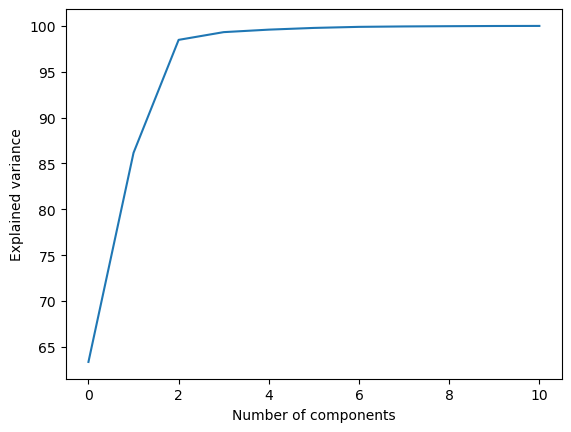

In [9]:
# PCA lemmatization CV
total_components = len(X.columns)
# X_lemmatization_cv
n_components = 3
X_PCA = perform_PCA (X, y, total_components, n_components)

In [10]:
# def split_data_train_test_split(X,y):
#  from sklearn.model_selection import train_test_split
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#  return(X_train, X_test,y_train,y_test)

import math
from sklearn.model_selection import train_test_split

def split_data_train_test_split(X,y):
    X_class = {
        0: [],
        1: []}
    for i in range(len(y)):
        X_class[y[i]].append(X[i])
    X_0_candidate = X_class[0][:len(X_class[1])]
    X_0_add = X_class[0][len(X_class[1]):]
    
    X_candidate = np.concatenate((X_0_candidate, X_class[1]))
    
    y_candidate = np.array([0 for i in range(len(X_0_candidate))])
    y_candidate = np.concatenate((y_candidate,np.array([1 for i in range(len(X_0_candidate))])))

    y_0_add = np.array([0 for i in range(len(X_0_add))])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_candidate, y_candidate, test_size = 0.2, random_state = 0)

#     X_test = np.concatenate((X_test, X_0_add))
#     y_test = np.concatenate((y_test, y_0_add))
    
    return(X_train, X_test,y_train,y_test)

In [11]:
X_train,X_test,y_train,y_test=split_data_train_test_split(X_PCA,y)

In [12]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [13]:


class Data:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

class Result:
    def __init__(self, y_test, y_pred, label=None):
        self.label = label
        self.accuracy = accuracy_score(y_test,y_pred) * 100
        self.precision = precision_score(y_test, y_pred, average='binary') * 100
        self.recall = recall_score(y_test, y_pred, average='binary') * 100
        self.f1 = f1_score(y_test, y_pred, average='binary') * 100
        self.confusion_matrix = confusion_matrix(y_test, y_pred)
        
    def show(self):
        print("Accuracy = ",self.accuracy,"%")
        print("Precision = ",self.precision)
        print("Recall = ",self.recall)
        print("F1 Score = ",self.f1)
        print("Confusion Matrix: \n", self.confusion_matrix)
        
def getResult(data, res):
    result = Result(data.y_test, res)
    result.show()
    return result

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

def getBestModel(data, model, param_grid, cv=10):
    scorer = make_scorer(metrics.f1_score , average='binary')
    grid = GridSearchCV(model, 
                        param_grid,
                        cv=cv,
                        scoring=scorer)


    grid.fit(data.x_train, data.y_train)
    
    return grid

In [14]:
from sklearn.svm import SVC
from sklearn import svm

def runSVM(data):
    svm_param_grid = {'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10], 
                      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                      'gamma': [1,0.1,0.01,0.001]
                     } 

    grid = getBestModel(data, svm.SVC(), svm_param_grid, cv=10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred)
    print(grid.best_params_)
    return grid

from sklearn.ensemble import RandomForestClassifier

def runRF(data):
    random_forest_params_grid = {
        'n_estimators': [i for i in range(100, 1000, 100)],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'random_state': [0]
    }

    grid = getBestModel(data, RandomForestClassifier(), random_forest_params_grid, 10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred)
    print(grid.best_params_)
    return grid
    
from sklearn.tree import DecisionTreeClassifier

def runDT(data):
    decision_tree_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [i for i in range(100, 1000, 100)],
        'max_features': ['sqrt', 'log2'],
        'random_state': [0]
    }

    grid = getBestModel(data, DecisionTreeClassifier(), decision_tree_params)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid

from sklearn.neighbors import KNeighborsClassifier

def runKNN(data):

    knn_params_grid = {
        'n_neighbors': [i for i in range(3,20)],
        'p': [1,2],
        'metric' : ['minkowski','euclidean','manhattan', 'chebyshev'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    grid = getBestModel(data, KNeighborsClassifier(), knn_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid

from sklearn.naive_bayes import GaussianNB

def runNB(data):

    nb_params_grid = {
    }

    grid = getBestModel(data, GaussianNB(), nb_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred)

    print(grid.best_params_)
    return grid


In [15]:
data = Data(X_train, y_train, X_test, y_test)

In [16]:
print('SVM')
grid = runSVM(data)

SVM
Accuracy =  73.5981308411215 %
Precision =  70.46413502109705
Recall =  79.52380952380952
F1 Score =  74.72035794183446
Confusion Matrix: 
 [[148  70]
 [ 43 167]]
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [17]:
print('RF')
grid = runRF(data)

RF
Accuracy =  73.13084112149532 %
Precision =  72.51184834123224
Recall =  72.85714285714285
F1 Score =  72.68408551068883
Confusion Matrix: 
 [[160  58]
 [ 57 153]]
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 700, 'random_state': 0}


In [18]:
print('DT')
grid = runDT(data)

DT
Accuracy =  68.45794392523365 %
Precision =  67.6056338028169
Recall =  68.57142857142857
F1 Score =  68.08510638297872
Confusion Matrix: 
 [[149  69]
 [ 66 144]]
{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}


In [19]:
print('KNN')
grid = runKNN(data)

KNN
Accuracy =  72.42990654205607 %
Precision =  71.29629629629629
Recall =  73.33333333333333
F1 Score =  72.30046948356808
Confusion Matrix: 
 [[156  62]
 [ 56 154]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 19, 'p': 1}


In [20]:
print('NB')
grid = runNB(data)

NB
Accuracy =  73.13084112149532 %
Precision =  70.74235807860262
Recall =  77.14285714285715
F1 Score =  73.80410022779043
Confusion Matrix: 
 [[151  67]
 [ 48 162]]
{}
